In [1]:
from network import Network

In [2]:
net = Network("networks/test.dat")

Loading network from networks/test.dat
Network label = test


100%|██████████| 18/18 [00:00<00:00, 378.36it/s]

PRIZMO variable detected: invt = 1d0 / Tgas
PRIZMO variable detected: t32 = Tgas / 3d2
KROME format detected: @format:R,R,P,P,rate
Variables found: ['av', 'crate', 'tgas']
Loaded 13 reactions
Sink:  N2+
Sink:  H2
generating ode...
All done!


In [3]:
# list some stuff
print([x.name for x in net.species])  # variable names
print([x.latex for x in net.species])  # latex names
print([x.mass for x in net.species])  # masses, g
print([x.charge for x in net.species]) # charges, e

print([x.get_verbatim() for x in net.reactions])  # reactionw names
print([x.get_latex() for x in net.reactions])  # latex names

print(net.reactions[0].get_verbatim())  # verbatim name of first reaction
print(net.reactions[0].serialized)

print(net.reactions[0].get_c())  # rate in C format of first reaction
print(net.reactions[0].get_f90())  # rate in Fortran 90 format of first reaction

print(net.reactions[0].is_same(net.reactions[0]))  # check if the first reaction is the same as itself
print(net.reactions[0].is_same(net.reactions[1]))  # check if the first reaction is the same as the second

net.reactions[0].rate  # rate of first reaction in symbolic form



['H+', 'e-', 'H', 'C', 'C+', 'CO+', 'CO', 'O', 'N2', 'N', 'N2+', 'H2']
['{\\rm H^{+}}', '{\\rm e^{-}}', '{\\rm H}', '{\\rm C}', '{\\rm C^{+}}', '{\\rm CO^{+}}', '{\\rm CO}', '{\\rm O}', '{\\rm N_{2}}', '{\\rm N}', '{\\rm N_{2}^{+}}', '{\\rm H_{2}}']
[1.673773e-24, 9.109383e-28, 1.673773e-24, 1.994473e-23, 1.994473e-23, 4.6512359999999996e-23, 4.6512359999999996e-23, 2.656763e-23, 4.651734e-23, 2.325867e-23, 4.651734e-23, 3.347546e-24]
[1, -1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
['H+ + e- -> H', 'H -> H+ + e-', 'C -> C+ + e-', 'C+ + e- -> C', 'CO+ + e- -> CO', 'C + O -> CO', 'CO -> C + O', 'CO -> CO+ + e-', 'N2 -> N + N', 'N + N -> N2', 'CO + N2+ -> N2 + CO+', 'H2 + e- -> H + H + e-', 'CO + N2+ -> N2 + CO+']
['${\\rm H^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm H}$', '${\\rm H}\\,\\to\\,{\\rm H^{+}} + {\\rm e^{-}}$', '${\\rm C}\\,\\to\\,{\\rm C^{+}} + {\\rm e^{-}}$', '${\\rm C^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm C}$', '${\\rm CO^{+}} + {\\rm e^{-}}\\,\\to\\,{\\rm CO}$', '${\\rm C} + {\\rm O}\\,\\to\\,

2.60224476150794e-10/tgas**0.75

In [4]:
net2 = Network("networks/test2.dat", label="very small network")

Loading network from networks/test2.dat
Network label = very small network


100%|██████████| 1/1 [00:00<00:00, 527.25it/s]

Variables found: ['tgas']
Loaded 1 reactions
Sink:  e-
Sink:  CO+
Source:  CO
generating ode...
All done!


In [5]:
net.compare_reactions(net2)  # compare two networks

Comparing networks "test" and "very small network"...
Found in "test" but not in "very small network": C+ + e- -> C
Found in "test" but not in "very small network": H+ + e- -> H
Found in "test" but not in "very small network": CO + N2+ -> N2 + CO+
Found in "test" but not in "very small network": CO -> CO+ + e-
Found in "test" but not in "very small network": CO -> C + O
Found in "test" but not in "very small network": C + O -> CO
Found in "test" but not in "very small network": C -> C+ + e-
Found in "test" but not in "very small network": H2 + e- -> H + H + e-
Found in "test" but not in "very small network": H -> H+ + e-
Found in "test" but not in "very small network": N2 -> N + N
Found in "test" but not in "very small network": N + N -> N2
Found 1 reactions in common
0 reactions missing in "test"
11 reactions missing in "very small network"


In [6]:
net.compare_species(net2)  # compare species in two networks

Comparing species in networks "test" and "very small network"...
Found 3 species in common: ['CO', 'CO+', 'e-']
Found 9 species in "test" but not in "very small network": ['C', 'C+', 'H', 'H+', 'H2', 'N', 'N2', 'N2+', 'O']
Found 0 species in "very small network" but not in "test": []


In [7]:
net = Network("networks/react_COthin")

Loading network from networks/react_COthin
Network label = react_COthin


  0%|          | 0/350 [00:00<?, ?it/s]

KROME variable detected: @var:Hnuclei = get_Hnuclei(n(:))
KROME variable detected: @var: Te = Tgas*8.617343d-5
KROME variable detected: @var: invT = 1d0/Tgas
KROME variable detected: @var: lnTe = log(Te)
KROME variable detected: @var: T = Tgas
KROME format detected: @format:idx,R,R,R,P,P,P,P,Tmin,Tmax,rate


  3%|▎         | 11/350 [00:00<00:03, 94.45it/s]

KROME format detected: @format:idx,R,R,R,P,P,P,Tmin,Tmax,rate
KROME variable detected: @var:invTe=1d0/Te
KROME variable detected: @var:logT=log10(Tgas)
KROME variable detected: @var:invsqrT=1d0/sqrt(Tgas)
KROME variable detected: @var:kl11 = 1d1**(-27.029d0+3.801d0*logT-29487d0*invT)
KROME variable detected: @var:kh11 = 1d1**(-2.729d0-1.75d0*logT-23474d0*invT)
KROME variable detected: @var:ncr11 = 1d1**(5.0792d0*(1d0-1.23d-5*(Tgas-2d3)))
KROME variable detected: @var:a11=1.d0/(1.d0+(Hnuclei/(ncr11+1d-40)))


  8%|▊         | 27/350 [00:00<00:04, 73.85it/s]

KROME format detected: @format:idx,R,R,R,P,P,P,Tmin,Tmax,rate


 14%|█▍        | 49/350 [00:00<00:03, 88.27it/s]

KROME variable detected: @var:kl21 = 1.18d-10*exp(-6.95d4*invT)
KROME variable detected: @var:kh21 = 8.125d-8*invsqrT*exp(-5.2d4*invT)*(1.d0-exp(-6d3*invT))
KROME variable detected: @var:ncr21 = 1d1**(4.845d0-1.3d0*log10(T*1d-4)+1.62d0*log10(T*1d-4)**2)
KROME variable detected: @var:a21=1.d0/(1.d0+(Hnuclei/(ncr21+1d-40)))


 28%|██▊       | 97/350 [00:00<00:02, 120.97it/s]

KROME variable detected: @var:u1 = 11.26d0*invTe
KROME variable detected: @var:u2 = 8.2d0*invTe
KROME variable detected: @var:u3 = 13.6*invTe
KROME format detected: @format:idx,R,R,R,P,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate


 71%|███████   | 248/350 [00:01<00:00, 337.45it/s]

KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,Tmin,Tmax,rate
KROME format detected: @format:idx,R,R,P,P,P,Tmin,Tmax,r

100%|██████████| 350/350 [00:01<00:00, 203.61it/s]

KROME format detected: @format:idx,R,P,P,rate
KROME variable detected: @var: user_H2self = fselfH2(1.87d21*(merge(n(idx_H2),n_global(idx_H2),n(idx_H2) > 0.0_8)*1d-3)**(2./3.), 1d5)
KROME variable detected: @var: HnOj = fHnOj(user_Av)
KROME format detected: @format:idx,R,P,P,P,rate
KROME variable detected: @var:ntot=sum(n(1:nmols))
KROME format detected: @format:idx,R,R,P,Tmin,Tmax,rate
Variables found: ['av', 'crate', 'idx_h', 'idx_h2', 'n', 'ntot', 'tgas', 'user_av', 'user_tdust']
Loaded 287 reactions
generating ode...
All done!


1.49810881307214e-10*(1/tgas)**0.6353


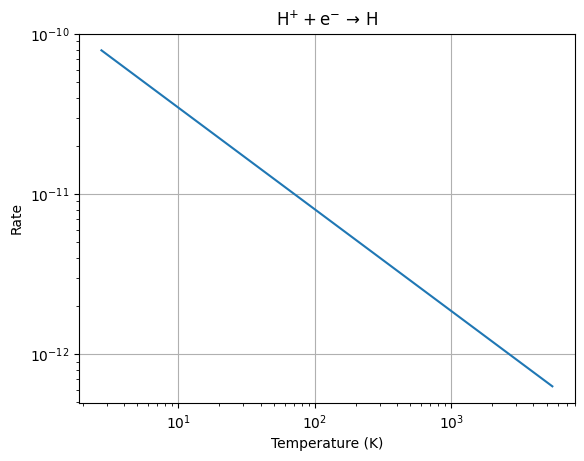

In [8]:
print(net.reactions[1].rate)  # verbatim name of first reaction in COthin network
net.reactions[1].plot()